In [342]:
base_url = "..\\experiment(Jupyter)_artifacts\\"
dataset_folder_path = "built_dataset"
train_file_name = "train.csv"
feature_engineering_artifacts_folder = "Feature_Engineering"
TARGET_FEATURE = "Time_taken"
useless_features = ['ID', 'Delivery_person_ID']
MAX_UNIQUE_VALUES_FOR_DISCRETE_FEATURES = 25
validation_file = "validation.csv"

# Loading libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from typing import List
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

# Creating the paths and folders

In [3]:
train_file_path = os.path.join(base_url,dataset_folder_path,train_file_name)

In [4]:
feature_engineering_folder = os.path.join(base_url,feature_engineering_artifacts_folder)

In [5]:
os.makedirs(feature_engineering_folder, exist_ok=True)

# Loading the data

In [6]:
train_df = pd.read_csv(train_file_path)

In [7]:
train_df.drop(useless_features,axis = 1, inplace= True)

In [8]:
train_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,15-03-2022,11:50,12:05,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,32.0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,16-03-2022,19:40,19:45,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,37.0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,31-03-2022,23:20,23:25,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,18.0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,20-03-2022,20:60,21:15,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,29.0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,30-03-2022,21:50,22:05,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,14.0


In [9]:
X_train, y_train = train_df.drop(TARGET_FEATURE, axis = 1), train_df[TARGET_FEATURE]

# Agenda

## Feature Engineering:

1. Handle Missing Values

2. Handle Temporal Variables

3. Handle Categorical Variables

4. Transformations

5. Standardizations


## Feature Generation

1. Genrating Distance from Latitude and Longitude

## Feature Selection:

1. Using Variance Threshold to see which feature has minimal variance

2. Correlation Analysis

3. Mutual Information Analysis

4. Chi Square Analysis

5. Model Bases Methods (Random Forest)

## Pipeline:

1. Building Final Pre-Processing Pipeline

In [10]:
numerical_features =[feature for feature in X_train.columns if X_train[feature].dtypes !='object']

In [11]:
categorical_features = list(set(X_train.columns) - set(numerical_features))

In [12]:
missing_values_features = [feature for feature in X_train.columns if X_train[feature].isnull().sum()>=1]

In [13]:
for feature in missing_values_features:
    print(f" Feature {feature} has {np.round((X_train[feature].isnull().mean())*100,4)} % missing values")

 Feature Delivery_person_Age has 4.1235 % missing values
 Feature Delivery_person_Ratings has 4.2386 % missing values
 Feature Time_Orderd has 3.863 % missing values
 Feature Weather has 1.3489 % missing values
 Feature Road_traffic_density has 1.3215 % missing values
 Feature multiple_deliveries has 2.1714 % missing values
 Feature Festival has 0.5127 % missing values
 Feature City has 2.6265 % missing values


# Handling Missing Categorical Features

Two approaches possible: 

1. Wherever there are missing values, add a new label altogether, for example, we can add something like 'Missing'

2. Do Mode imputation



In [14]:
def fix_categorical_features(dataset:pd.DataFrame, categorical_features:List[str]):
    #print(categorical_features)
    for feature in categorical_features:
        dataset[feature] = dataset[feature].fillna('missing')
    return dataset

In [15]:
categorical_features

['Type_of_order',
 'Festival',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather',
 'Road_traffic_density',
 'City',
 'Type_of_vehicle',
 'Order_Date']

In [16]:
missing_categorical_features = [feature for feature in categorical_features if feature in set(missing_values_features)]

In [17]:
missing_categorical_features

['Festival', 'Time_Orderd', 'Weather', 'Road_traffic_density', 'City']

In [18]:
data = X_train.copy()

In [19]:
data = fix_categorical_features(data, missing_categorical_features)

In [20]:
data[missing_categorical_features[0]].unique()

array(['No', 'Yes', 'missing'], dtype=object)

# Mode imputation, will use only if it doesn't distort the distribution

In [21]:
missing_categorical_features

['Festival', 'Time_Orderd', 'Weather', 'Road_traffic_density', 'City']

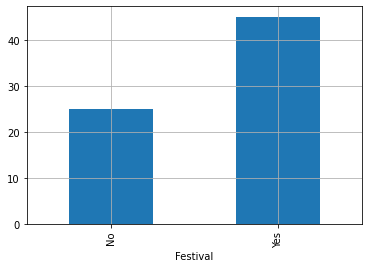

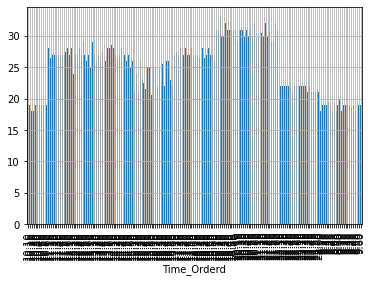

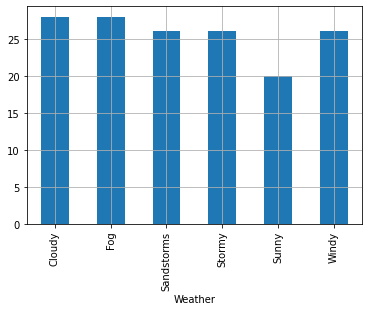

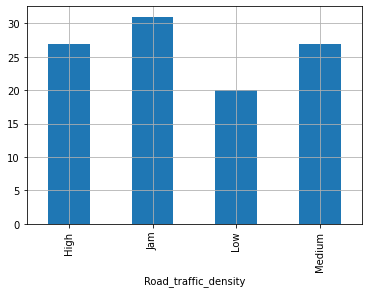

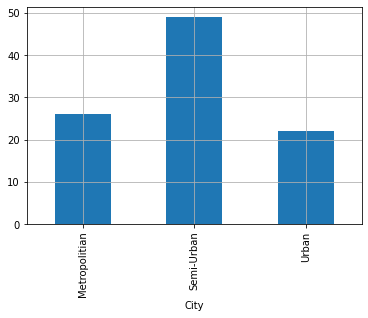

In [22]:
data = train_df.copy()
for feature in missing_categorical_features:
    data.groupby(feature)[TARGET_FEATURE].median().plot.bar()
    plt.grid()
    plt.show()

### After impuatation

In [23]:
data = train_df.copy()

In [24]:
data = data[missing_categorical_features]

In [25]:
imputer = SimpleImputer(strategy='most_frequent')

In [26]:
imputer.fit(data)

SimpleImputer(strategy='most_frequent')

In [27]:
transformed_data = imputer.transform(data)

In [28]:
data = pd.DataFrame(transformed_data, columns=data.columns)

In [29]:
data = pd.concat([data,train_df[TARGET_FEATURE]], axis = 1)

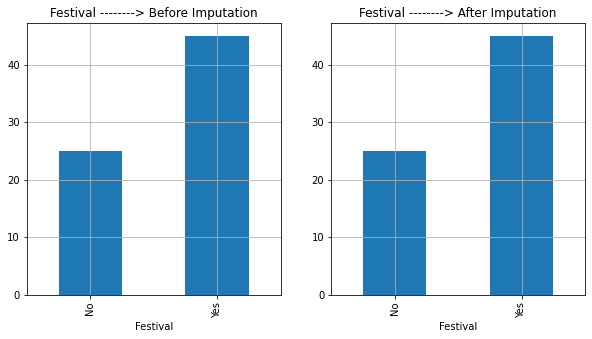

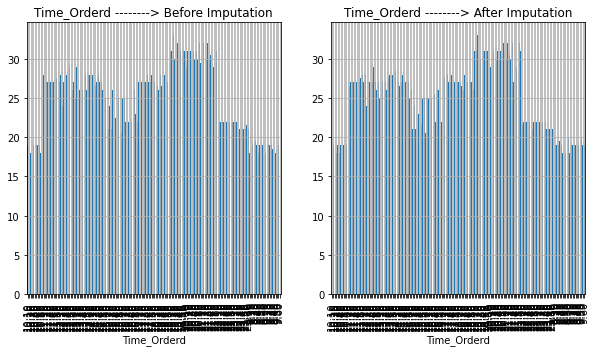

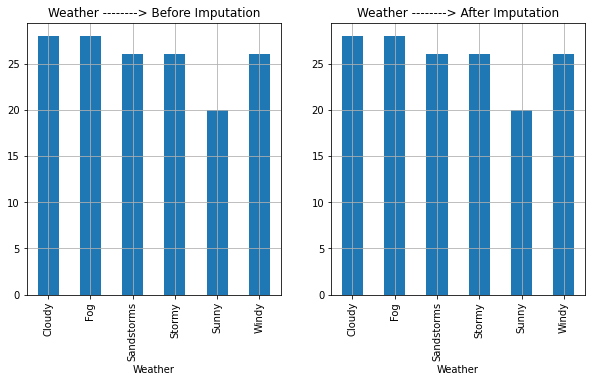

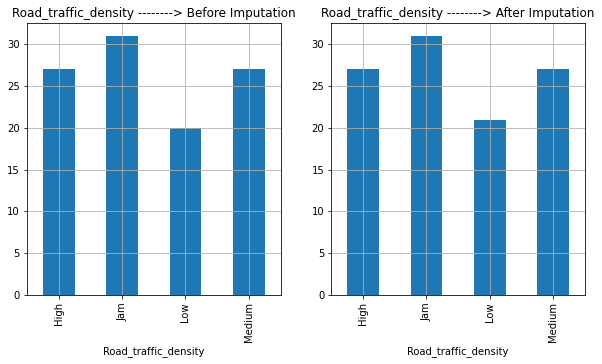

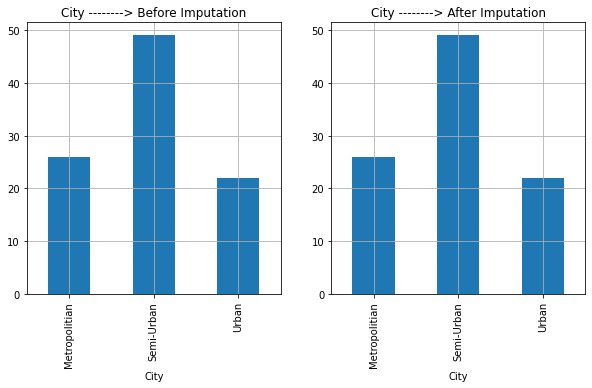

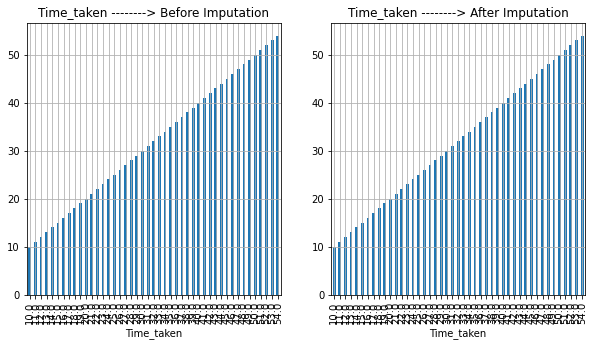

In [30]:
for feature in data.columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(f"{feature} --------> Before Imputation")
    train_df.groupby(feature)[TARGET_FEATURE].median().plot.bar()
    plt.grid()
    
    
    plt.subplot(1,2,2)
    plt.title(f"{feature} --------> After Imputation")
    data.groupby(feature)[TARGET_FEATURE].median().plot.bar()
    plt.grid()
    
    plt.show()
    
    
    

### Distribution looks nearly same, can go with this approach as well

# Final Preprocess Pipleine 1:

1. Can simply use Mode Imputation as Distribution is not changing

## Handling Numerical missing values

In [31]:
missing_numerical_features = [feature for feature in numerical_features if feature in set(missing_values_features)]

In [32]:
missing_numerical_features

['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']

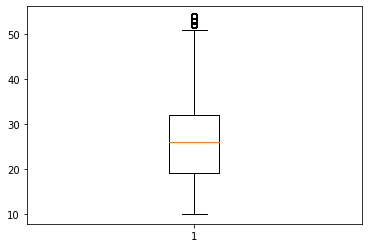

In [33]:
plt.boxplot(y_train)
plt.show()

#### Outliers in Target Feature, so will need to use median over mean

#### Technique to handle

Can do Median Imputation. But this ends up distorting the distribution of feature. To remedy this, we can add another feature which tracks if a particular value was missing or not. This has a pitfall that it increases the dimensionality. Considering we have limited features, let's pursue this.

Can go with simple median imputation as well

In [34]:
def fix_numerical_features(dataset:pd.DataFrame, numerical_features:List[str]):
    
    for feature in numerical_features:
        
        ## getting median value
        median_value = dataset[feature].median()
        
        ## creating new feature to capture nan
        dataset[feature+'_nan'] = np.where(dataset[feature].isnull(),1,0)
        
        ## filling with median
        dataset[feature].fillna(median_value,inplace=True)
    
        
    return dataset

In [35]:
data = X_train.copy()

In [36]:
fix_numerical_features(data, numerical_features= missing_numerical_features)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,15-03-2022,11:50,12:05,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,0,0,0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,16-03-2022,19:40,19:45,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,0,0,0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,31-03-2022,23:20,23:25,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,0,0,0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,20-03-2022,20:60,21:15,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,0,0,0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,30-03-2022,21:50,22:05,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,09-03-2022,23:30,23:45,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,0,0,0
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,24-03-2022,11:30,11:45,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,0,0,0
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,13-03-2022,8:15,8:25,Sunny,Low,2,Drinks,scooter,0.0,No,NaN,0,0,0
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,08-03-2022,18:15,18:30,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,0,0,0


### Can use median imputation simply as well

##### Let's first see the original distribution

In [37]:
data = X_train.copy()

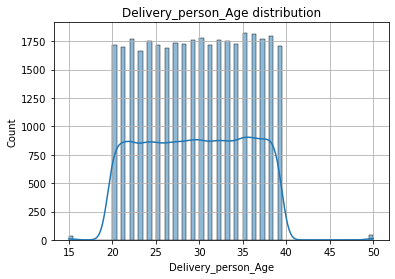

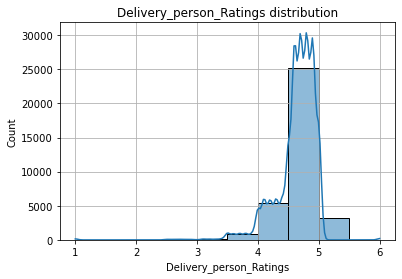

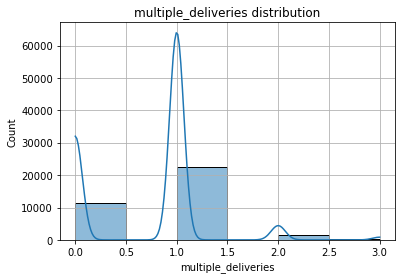

In [38]:
for feature in missing_numerical_features:
    sns.histplot(data[feature], kde=True, binwidth=0.5)
    
    plt.grid()
    plt.title(f'{feature} distribution')
    plt.show()

### After median imputation

In [39]:
imputer = SimpleImputer(strategy='median')

In [40]:
data = X_train[missing_numerical_features].copy()
data = imputer.fit_transform(data)

In [41]:
data = pd.DataFrame(data,columns=missing_numerical_features)

#### Plots after imputation

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


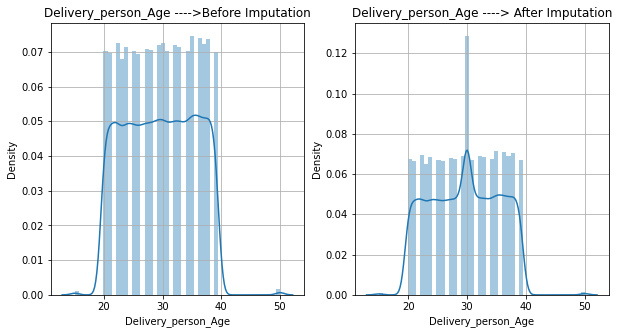

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


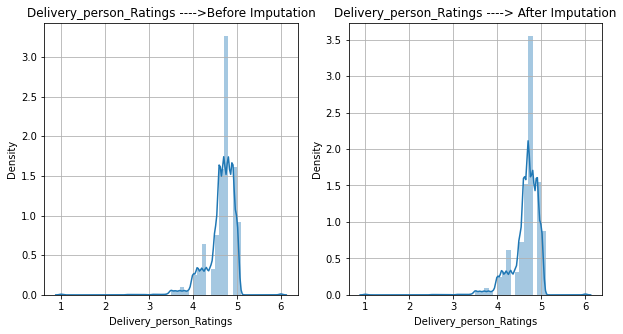

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


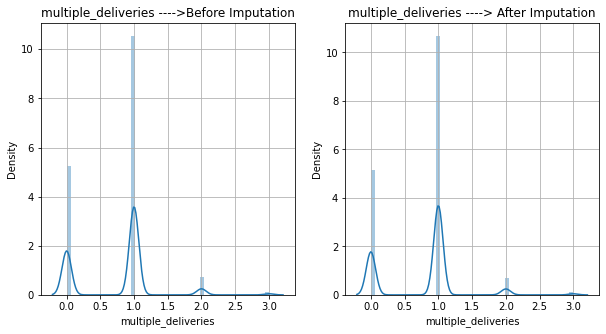

In [42]:
for feature in missing_numerical_features:
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(f"{feature} ---->Before Imputation")
    sns.distplot(X_train[feature])
    plt.grid()
    
    
    plt.subplot(1,2,2)
    plt.title(f"{feature} ----> After Imputation")
    sns.distplot(data[feature])
    plt.grid()
    
    
    plt.show()

#### Delivery Person Ratings and Delivery Person Age are seeing significant distortions. Hence will not simply go with median imputation. Will go with 1st approach of creating new feature to capture these nan values

# Final Preprocessing pipeline 2:

Need to create additional feature as distribution is changing with median imputation

In [43]:
transformed_data = X_train.copy()

In [44]:
transformed_data = fix_categorical_features(transformed_data, categorical_features=missing_categorical_features)

In [45]:
transformed_data = fix_numerical_features(transformed_data,missing_numerical_features)

In [46]:
transformed_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,15-03-2022,11:50,12:05,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,0,0,0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,16-03-2022,19:40,19:45,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,0,0,0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,31-03-2022,23:20,23:25,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,0,0,0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,20-03-2022,20:60,21:15,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,0,0,0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,30-03-2022,21:50,22:05,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,09-03-2022,23:30,23:45,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,0,0,0
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,24-03-2022,11:30,11:45,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,0,0,0
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,13-03-2022,8:15,8:25,Sunny,Low,2,Drinks,scooter,0.0,No,missing,0,0,0
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,08-03-2022,18:15,18:30,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,0,0,0


# Handling Temporal Features

In [47]:
temporal_features = ['Order_Date','Time_Order_picked','Time_Orderd']

In [48]:
### These are in categorical features so let's drop these from categorical features list

categorical_features = [feature for feature in categorical_features if feature not in set(temporal_features)]


In [49]:
categorical_features

['Type_of_order',
 'Festival',
 'Weather',
 'Road_traffic_density',
 'City',
 'Type_of_vehicle']

In [50]:
temporal_features

['Order_Date', 'Time_Order_picked', 'Time_Orderd']

In [51]:
numerical_features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries']

Strategies to handle:


1. In Order Date, only order day seemed important, order month and order year seemed uniform so won't use them. For now, let's extract all, will see if they help in Feature Selection, if they don't will drop there

2. Time Ordered and Time Order Picked are highly correlated. Only need one of these features. As there are missing values in Time Ordered, will drop it and use Time Order Picked
    

In [52]:
transformed_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,15-03-2022,11:50,12:05,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,0,0,0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,16-03-2022,19:40,19:45,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,0,0,0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,31-03-2022,23:20,23:25,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,0,0,0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,20-03-2022,20:60,21:15,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,0,0,0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,30-03-2022,21:50,22:05,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,09-03-2022,23:30,23:45,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,0,0,0
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,24-03-2022,11:30,11:45,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,0,0,0
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,13-03-2022,8:15,8:25,Sunny,Low,2,Drinks,scooter,0.0,No,missing,0,0,0
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,08-03-2022,18:15,18:30,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,0,0,0


#### Order Date

In [53]:
transformed_data['Order_Date_Day'] = transformed_data['Order_Date'].str.split('-').str[0].astype(int)

In [54]:
transformed_data['Order_Month'] = transformed_data['Order_Date'].str.split('-').str[1].astype(int)
transformed_data['Order-Year'] = transformed_data['Order_Date'].str.split('-').str[2].astype(int)

In [55]:
transformed_data.drop('Order_Date', inplace=True, axis = 1)

In [56]:
transformed_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan,Order_Date_Day,Order_Month,Order-Year
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,11:50,12:05,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,0,0,0,15,3,2022
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,19:40,19:45,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,0,0,0,16,3,2022
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,23:20,23:25,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,0,0,0,31,3,2022
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,20:60,21:15,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,0,0,0,20,3,2022
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,21:50,22:05,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,0,0,0,30,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,23:30,23:45,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,0,0,0,9,3,2022
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,11:30,11:45,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,0,0,0,24,3,2022
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,8:15,8:25,Sunny,Low,2,Drinks,scooter,0.0,No,missing,0,0,0,13,3,2022
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,18:15,18:30,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,0,0,0,8,3,2022


### Time Order Picked

In [57]:
transformed_data['Time_Order_picked_Hr'] = transformed_data['Time_Order_picked'].str.split(':').str[0].astype(int)

In [58]:
transformed_data['Time_Order_picked_Min'] = transformed_data['Time_Order_picked'].str.split(':').str[1].astype(int)

In [59]:
transformed_data.drop(['Time_Orderd','Time_Order_picked'],axis = 1, inplace=True)

In [60]:
transformed_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan,Order_Date_Day,Order_Month,Order-Year,Time_Order_picked_Hr,Time_Order_picked_Min
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,Cloudy,High,1,Buffet,scooter,1.0,No,Metropolitian,0,0,0,15,3,2022,12,5
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,Sandstorms,Jam,1,Buffet,motorcycle,0.0,No,Metropolitian,0,0,0,16,3,2022,19,45
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,Sandstorms,Low,2,Meal,motorcycle,1.0,No,Metropolitian,0,0,0,31,3,2022,23,25
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,Stormy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,0,0,0,20,3,2022,21,15
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,Sandstorms,Jam,2,Drinks,electric_scooter,1.0,No,Metropolitian,0,0,0,30,3,2022,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,0,0,0,9,3,2022,23,45
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,0,0,0,24,3,2022,11,45
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,Sunny,Low,2,Drinks,scooter,0.0,No,missing,0,0,0,13,3,2022,8,25
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,Cloudy,Medium,2,Meal,scooter,1.0,No,Metropolitian,0,0,0,8,3,2022,18,30


# Final Pipeline 3:

1. Extract Day from Date Ordered to create new feature. Month seems uniform

2. Extract Hour from Time Order Picked. Minute seens uniform
    

# Handling Categorical Features

In [61]:
categorical_features

['Type_of_order',
 'Festival',
 'Weather',
 'Road_traffic_density',
 'City',
 'Type_of_vehicle']

In [62]:
for feature in categorical_features:
    print(f"For feature : {feature}, the unique features are {transformed_data[feature].unique()}")
    print("--------------------------------------------------")

For feature : Type_of_order, the unique features are ['Buffet' 'Meal' 'Snack' 'Drinks']
--------------------------------------------------
For feature : Festival, the unique features are ['No' 'Yes' 'missing']
--------------------------------------------------
For feature : Weather, the unique features are ['Cloudy' 'Sandstorms' 'Stormy' 'Windy' 'Sunny' 'Fog' 'missing']
--------------------------------------------------
For feature : Road_traffic_density, the unique features are ['High' 'Jam' 'Low' 'Medium' 'missing']
--------------------------------------------------
For feature : City, the unique features are ['Metropolitian' 'Urban' 'Semi-Urban' 'missing']
--------------------------------------------------
For feature : Type_of_vehicle, the unique features are ['scooter' 'motorcycle' 'electric_scooter' 'bicycle']
--------------------------------------------------


## Type of categorical features

City, Whether, Type of vehicle, Type of order are nominal

Festival, Road Traffic Density are Ordinal

In [63]:
ordinal_features = ['Festival','Road_traffic_density']

In [64]:
nominal_features = list(set(categorical_features) - set(ordinal_features))

## Label Encoding on Ordinal Features

Festival: 

Possible values: 'No', 'Yes', 'missing'.

Will assign :

'No': 0

'Yes': 1

'missing' : 0  (No is the mode)

In [65]:
transformed_data['Festival'] = transformed_data['Festival'].map({
    'No':0,
    'Yes':1,
    'missing':0
    
})

Road Traffic Density:

Possible values:

'High' 'Jam' 'Low' 'Medium' 'missing'


Will assign:

'Low' : 0

'Medium' : 1

'High' : 2

'Jam':3

'missing' : 0 (Low is the mode)

In [66]:
transformed_data['Road_traffic_density']=transformed_data['Road_traffic_density'].map({
    'Low':0,
    'Medium' : 1,
    'High' : 2,
    'Jam':3,
    'missing' : 0
})

In [67]:
transformed_data['Road_traffic_density'].value_counts()

0    12848
3    11325
1     8761
2     3540
Name: Road_traffic_density, dtype: int64

# Final Preprocess Pipeline 3:

Use Label Encoding on Road Traffic Density and Festival

## OHE Nominal Variables

In [68]:
nominal_features

['Type_of_order', 'City', 'Type_of_vehicle', 'Weather']

In [69]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [70]:
ohe_encoder.fit(transformed_data[nominal_features])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [71]:
ohe_transformed_array = ohe_encoder.transform(transformed_data[nominal_features])

In [72]:
ohe_df = pd.DataFrame(ohe_transformed_array,columns=ohe_encoder.get_feature_names(input_features=nominal_features))

C:\Users\rachi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
transformed_data = pd.concat([transformed_data,ohe_df],axis = 1).drop(nominal_features,axis=1)

In [74]:
transformed_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan,Order_Date_Day,Order_Month,Order-Year,Time_Order_picked_Hr,Time_Order_picked_Min,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,City_Metropolitian,City_Semi-Urban,City_Urban,City_missing,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Weather_missing
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,2,1,1.0,0,0,0,0,15,3,2022,12,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,3,1,0.0,0,0,0,0,16,3,2022,19,45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,0,2,1.0,0,0,0,0,31,3,2022,23,25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,3,1,1.0,0,0,0,0,20,3,2022,21,15,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,3,2,1.0,0,0,0,0,30,3,2022,22,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36469,24.0,5.0,12.972161,77.596014,13.032161,77.656014,0,2,0.0,0,0,0,0,9,3,2022,23,45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36470,29.0,3.6,12.310972,76.659264,12.320972,76.669264,2,0,3.0,0,0,0,0,24,3,2022,11,45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36471,31.0,4.7,12.970221,77.645396,12.980221,77.655396,0,2,0.0,0,0,0,0,13,3,2022,8,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36472,38.0,4.2,21.175975,72.795503,21.305975,72.925503,1,2,1.0,0,0,0,0,8,3,2022,18,30,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### All features are in numerical format

# PreProcess Pipeline:

OHE on nominal features

# Feature Generation

#### We can calculate distance b.w Restraunt and destination. It can be a good feature

#### We can use haversine formula to calculate distance 

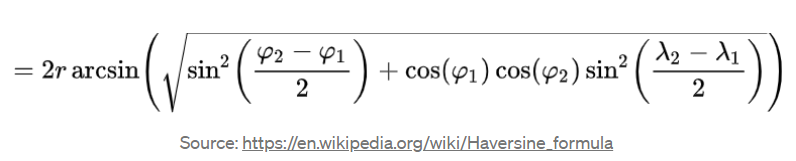

In [75]:
distance_features = ["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

In [76]:
distance_df = transformed_data[distance_features]

#### Converting latitude and longitude to radians

In [77]:
for feature in distance_df.columns:
    distance_df[feature] = np.radians(distance_df[feature])

<ipython-input-77-3b309308504d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df[feature] = np.radians(distance_df[feature])


In [78]:
from sklearn.neighbors import DistanceMetric

In [79]:
dist = DistanceMetric.get_metric('haversine')

C:\Users\rachi\anaconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [80]:
distance_df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0.214867,1.337957,0.215216,1.338306
1,0.397258,1.324487,0.398829,1.326058
2,0.369575,1.270675,0.370972,1.272072
3,0.469702,1.322912,0.471098,1.324308
4,0.214667,1.337666,0.215540,1.338539
...,...,...,...,...
36469,0.226407,1.354306,0.227454,1.355353
36470,0.214867,1.337957,0.215042,1.338131
36471,0.226373,1.355168,0.226548,1.355342
36472,0.369590,1.270521,0.371859,1.272790


In [81]:
lat1 = distance_df['Restaurant_latitude']
lon1 = distance_df['Restaurant_longitude']

lat2 = distance_df['Delivery_location_latitude']
lon2 = distance_df['Delivery_location_longitude']

In [82]:
newlon = lon2 - lon1
newlat = lat2 - lat1

In [83]:
haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

In [84]:
dist = 2 * np.arcsin(np.sqrt(haver_formula ))

In [85]:
km = 6367 * dist #6367 for distance in KM for miles use 3958


### Adding this to the transformed_data dataframe

In [86]:
transformed_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Delivery_person_Age_nan,Delivery_person_Ratings_nan,multiple_deliveries_nan,Order_Date_Day,Order_Month,Order-Year,Time_Order_picked_Hr,Time_Order_picked_Min,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,City_Metropolitian,City_Semi-Urban,City_Urban,City_missing,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Weather_missing
0,32.0,4.6,12.310972,76.659264,12.330972,76.679264,2,1,1.0,0,0,0,0,15,3,2022,12,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,4.5,22.761226,75.887522,22.851226,75.977522,3,1,0.0,0,0,0,0,16,3,2022,19,45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,4.9,21.175104,72.804342,21.255104,72.884342,0,2,1.0,0,0,0,0,31,3,2022,23,25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,27.0,4.7,26.911927,75.797282,26.991927,75.877282,3,1,1.0,0,0,0,0,20,3,2022,21,15,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,28.0,4.8,12.299524,76.642620,12.349524,76.692620,3,2,1.0,0,0,0,0,30,3,2022,22,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
transformed_data['Distance'] = km

# PreProcess Pipeline

If distance is an important feature after Feature Selection, calculate distance from latitude and longitude

### Standardization

In [88]:
std_scaler = StandardScaler()

In [89]:
std_scaler.fit(transformed_data)

StandardScaler()

In [90]:
transformed_data = pd.DataFrame(std_scaler.transform(transformed_data), columns=transformed_data.columns)

# Feature Selection

### Variance Analysis - Dropping Constant features

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement.

We remove those features, which have very minimal variance. That simply means that these features are constant

In [91]:
from sklearn.feature_selection import VarianceThreshold

In [92]:
var_thresh_obj = VarianceThreshold(threshold=0)

In [93]:
var_thresh_obj.fit(transformed_data)

VarianceThreshold(threshold=0)

In [94]:
var_thresh_obj.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [95]:
constant_columns = [column for column in transformed_data.columns if column not in set(transformed_data.columns[var_thresh_obj.get_support()])]

In [96]:
constant_columns

['Order-Year']

#### Order Year feature is constant and we don't need to generate it

## Corelation Analysis
If an Independant feature and dependant feature are corelated, that is desireable

If 2 independant features are corelated, we can easily drop one as it reduces Curse of Dimesnionality, also reduces Multi Colinearity

In [97]:
concat_df = pd.concat([transformed_data,pd.DataFrame(y_train)], axis = 1)

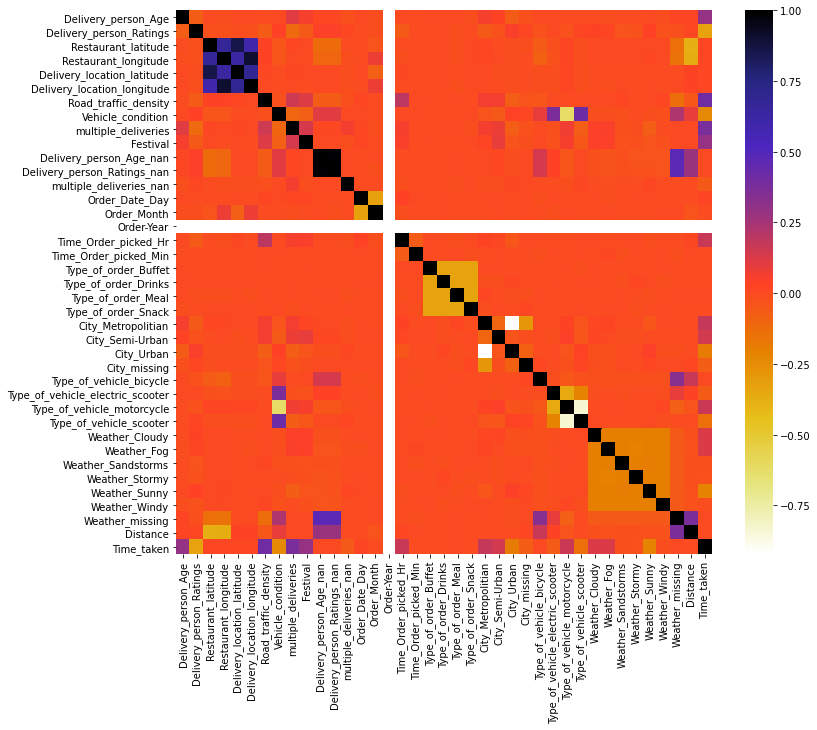

In [98]:
plt.figure(figsize=(12,10))
cor = concat_df.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

## Information Gain (Mutual Information)
Mutual Information: A non negative value, that measures the dependancy b/w the variables. It quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable by observing the other random variable.


Higher the value, more important the feature is

In [99]:
from sklearn.feature_selection import mutual_info_regression


In [100]:
mutual_info = mutual_info_regression(transformed_data,y_train)

In [101]:
mutual_info = pd.Series(mutual_info)

In [102]:
mutual_info.index = transformed_data.columns

In [103]:
mutual_info.sort_values(ascending=False)


Delivery_person_Ratings             0.161017
Time_Order_picked_Hr                0.133969
Road_traffic_density                0.115479
multiple_deliveries                 0.115277
Distance                            0.093968
Order_Date_Day                      0.080735
Delivery_person_Age                 0.076356
Delivery_location_latitude          0.064085
Vehicle_condition                   0.055320
Festival                            0.053855
Delivery_location_longitude         0.049696
Weather_Sunny                       0.024845
City_Urban                          0.023319
City_Semi-Urban                     0.017908
Type_of_vehicle_motorcycle          0.017723
City_Metropolitian                  0.016947
Type_of_vehicle_scooter             0.016122
Weather_Cloudy                      0.012273
Weather_Sandstorms                  0.008351
Restaurant_longitude                0.008066
City_missing                        0.007885
Weather_Fog                         0.007824
Delivery_p

# Model Based methods

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf = RandomForestRegressor()

In [106]:
rf.fit(transformed_data,y_train)

RandomForestRegressor()

In [107]:
imp = rf.feature_importances_

In [108]:
imp = pd.Series(imp)
imp.index = transformed_data.columns

In [109]:
imp.sort_values(ascending=False)

Delivery_person_Ratings             0.197993
Road_traffic_density                0.121796
multiple_deliveries                 0.118186
Distance                            0.105383
Delivery_person_Age                 0.089715
Weather_Sunny                       0.071176
Vehicle_condition                   0.068129
Weather_Fog                         0.041906
Weather_Cloudy                      0.040731
Order_Date_Day                      0.015662
Time_Order_picked_Min               0.014067
Delivery_location_longitude         0.013989
Delivery_location_latitude          0.013529
Restaurant_latitude                 0.013336
Restaurant_longitude                0.012573
Festival                            0.011443
Time_Order_picked_Hr                0.010819
City_Metropolitian                  0.003911
Order_Month                         0.003405
Type_of_order_Buffet                0.002720
Type_of_order_Meal                  0.002575
Type_of_order_Snack                 0.002549
Type_of_or

In [110]:
cum_sum = np.cumsum(imp.sort_values(ascending=False))

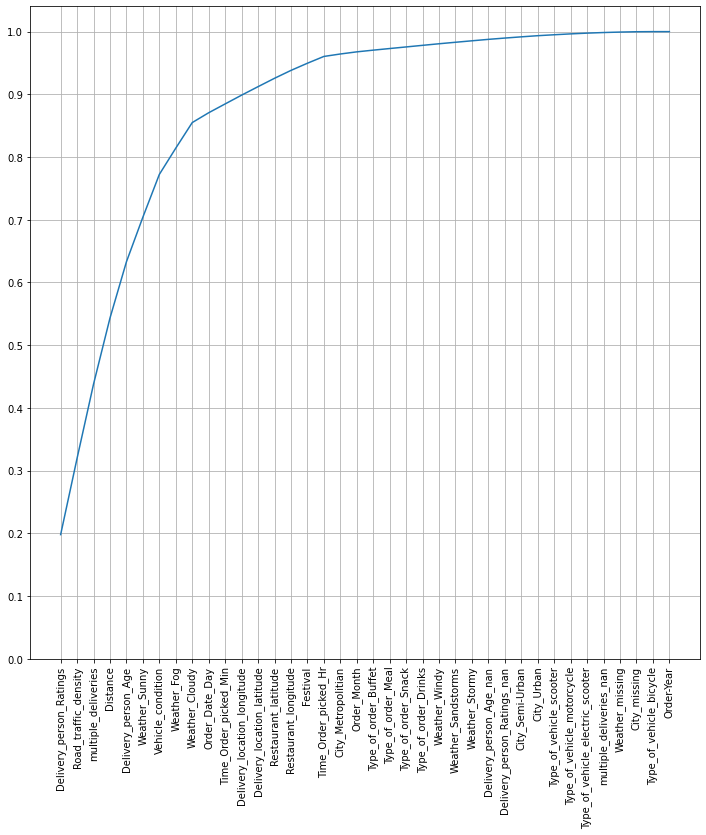

In [111]:
plt.figure(figsize=(12,12))
plt.plot(np.cumsum(imp.sort_values(ascending=False)))
plt.xticks(rotation = '90')
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.show()

In [112]:
cum_sum

Delivery_person_Ratings             0.197993
Road_traffic_density                0.319789
multiple_deliveries                 0.437975
Distance                            0.543358
Delivery_person_Age                 0.633073
Weather_Sunny                       0.704250
Vehicle_condition                   0.772379
Weather_Fog                         0.814285
Weather_Cloudy                      0.855016
Order_Date_Day                      0.870677
Time_Order_picked_Min               0.884744
Delivery_location_longitude         0.898733
Delivery_location_latitude          0.912262
Restaurant_latitude                 0.925599
Restaurant_longitude                0.938172
Festival                            0.949615
Time_Order_picked_Hr                0.960433
City_Metropolitian                  0.964345
Order_Month                         0.967750
Type_of_order_Buffet                0.970470
Type_of_order_Meal                  0.973045
Type_of_order_Snack                 0.975594
Type_of_or

# Final Pipeline

Pipeline components:
    
    
1. Handle Categorical Features: Use Mode Imputation

2. Numerical Features: Median Imputation + Create new feature to capture missing values

3. Temporal Features: 

    Date Ordered: 
    
    Extract Day and Month (make extraction features as Hyperparameters)

    Time Order Picked: Extract Hour and Minutes (make extraction features as Hyperparamaters)
    

4. Encoding: Label Encode ordinal features, OHE nominal features

5. Generate Distance Feature using latitude and longitude features

6. Do standardization

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin

In [226]:
class DropUndersiredFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop=['ID', 'Delivery_person_ID']):
        
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self  # nothing to do

    def transform(self, X, y=None):
        df = X.copy()
        for feature in self.features_to_drop:
            ## try and catch to avoid run time errors
            try:
                df.drop(feature, axis=1, inplace=True)
            except:
                pass

        return df


In [175]:
## Imputing Numerical features class

class ImputeNumericalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numerical_features_nan = []
        self.medians = []
        
    def fit(self,X,y=None):
        try:
            ### Numerical features having null features
            
            self.numerical_features_nan = [feature for feature in X.columns if X[feature].dtypes !='O' and X[feature].isnull().sum()>=1]
        
            self.medians = []
            for feature in self.numerical_features_nan:
                self.medians.append(X[feature].median())
        except:
            pass
        
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        for index, feature in enumerate(self.numerical_features_nan):

            try:
                median_value = self.medians[index]
                ## create new feature to capture nan values
                df[feature + '_nan'] = np.where(df[feature].isnull(), 1, 0)
                ### replace the missing values with median
                df[feature] = df[feature].fillna(median_value)

            except:
                pass
        return df
        
        

In [176]:
class ImputeCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categorical_features = []  # empty categorical features list

    def fit(self, X, y=None):
        try:
            # Get the categorical features
            self.categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']
        except:
            pass

        return self

    def transform(self, X, y=None):
        ## standardize the features
        df = X.copy()
        try:
            for feature in self.categorical_features:
                df[feature] = df[feature].str.lower()
        except:
            pass

        ## Handle missing values
        try:
            df[self.categorical_features] = df[self.categorical_features].fillna('missing')

        except:
            pass

        return df


In [177]:
class ExtractFromTemporalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, temporal_features = ['Order_Date', 'Time_Order_picked', 'Time_Orderd']):
        
        self.temporal_features = temporal_features
    
    def fit(self, X, y = None):
        
        return self
    
    def transform(self, X, y = None):
        df = X.copy()
        
        try:
            ## Working on Order Date
            df[self.temporal_features[0]+"_Day"] = df[self.temporal_features[0]].str.split('-').str[0].astype(int)
            df[self.temporal_features[0]+"_Month"] = df[self.temporal_features[0]].str.split('-').str[1].astype(int)
            
            
            
            ### Working on Time Order Picked
            df[self.temporal_features[1]+"_Hr"] = df[self.temporal_features[1]].str.split(':').str[0].astype(int)
            df[self.temporal_features[1]+"_Min"] = df[self.temporal_features[1]].str.split(':').str[1].astype(int)
            
            df.drop(self.temporal_features, axis = 1, inplace = True)
            
            return df
        except Exception as e:
            print(str(e))
        
        

In [178]:
class GenerateDistanceFromLatitudeAndLongitude(BaseEstimator,TransformerMixin):
    def __init__(self,distance_features = ['Restaurant_latitude', 'Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']):
        self.distance_features = distance_features
    
    def fit(self,X,y=None):
        #print('fit')
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        #print('transform')
        try:
            ## Convert features to radians
            for feature in self.distance_features:
                df[feature] = np.radians(df[feature])
                
            lat1 = df[self.distance_features[0]]
            lon1 = df[self.distance_features[1]]
            
            lat2 = df[self.distance_features[2]]
            lon2 = df[self.distance_features[3]]
            
            
            newlon = lon2 - lon1
            newlat = lat2 - lat1
            
            haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
            
            dist = 2 * np.arcsin(np.sqrt(haver_formula ))
            
            km = 6367 * dist #6367 for distance in KM for miles use 3958

            df['Distance'] = km
            return df
         
        except Exception as e:
            print(str(e))
        

In [297]:
class Label_Encode(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_features = ['Festival','Road_traffic_density']):
        self.ordinal_features = ordinal_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        try:
            #print(df[self.ordinal_features])
            df['Festival'] = df['Festival'].map({'no':0,'yes':1,'missing':0})
            df['Road_traffic_density']=df['Road_traffic_density'].map({'low':0,'medium' : 1,'high' : 2,'jam':3,'missing' : 0})
            
            
            return df
        except:
            print(str(e))

In [301]:
class OHE_Categorical_Features(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categorical_features = []
        self.ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

    def fit(self, X, y=None):
        try:
            self.categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']
            self.ohe.fit(X[self.categorical_features])
            ##print(self.ohe.categories_)
        except:
            pass

        return self

    def transform(self, X, y=None):
        df = X.copy()
        try:
            cat_ohe = self.ohe.transform(df[self.categorical_features])

            ohe_df = pd.DataFrame(cat_ohe, columns=self.ohe.get_feature_names(input_features=self.categorical_features),
                                  index=df.index)
            df = pd.concat([df, ohe_df], axis=1).drop(columns=self.categorical_features, axis=1)
        except Exception as e:
            pass

        return df

In [302]:
preprocess_pipeline = Pipeline([
    ('drop_undesired_features',DropUndersiredFeatures()),
    ('impute_numerical_features',ImputeNumericalFeatures()),
    ('impute_categorical_features', ImputeCategoricalFeatures()),
    ('label_encode',Label_Encode()),
    ('extract_temporal_features', ExtractFromTemporalFeatures()),
    
    ('generate_distance', GenerateDistanceFromLatitudeAndLongitude()),
    
    ('OHE', OHE_Categorical_Features()),
    ('scaler', StandardScaler())
])

In [320]:
preprocess_pipeline = Pipeline([
    ('drop_undesired_features',DropUndersiredFeatures()),
    ('impute_numerical_features',ImputeNumericalFeatures()),
    ('impute_categorical_features', ImputeCategoricalFeatures()),
    ('extract_temporal_features', ExtractFromTemporalFeatures()),
    
    ('generate_distance', GenerateDistanceFromLatitudeAndLongitude()),
    
    ('OHE', OHE_Categorical_Features()),
    ('scaler', StandardScaler())
])

In [321]:
transformed_X_train = preprocess_pipeline.fit_transform(X_train)

C:\Users\rachi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [322]:
transformed_X_train

array([[ 0.42199756, -0.11126878, -0.57464047, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [ 0.42199756, -0.41703368,  0.7012496 , ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [ 1.47553039,  0.80602591,  0.50759715, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       ...,
       [ 0.24640876,  0.19449612, -0.49415159, ...,  6.08876579,
        -0.0591109 , -0.53319394],
       [ 1.47553039, -1.33432837,  0.50770349, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [-0.80712407,  0.80602591, -0.48721715, ..., -0.1642369 ,
        -0.0591109 , -0.53319394]])

In [323]:
y_train

0        32.0
1        37.0
2        18.0
3        29.0
4        14.0
         ... 
36469    22.0
36470    48.0
36471    18.0
36472    31.0
36473    34.0
Name: Time_taken, Length: 36474, dtype: float64

In [337]:
rf = RandomForestRegressor(n_estimators=1000)

In [338]:
rf.fit(transformed_X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [339]:
pred = rf.predict(transformed_X_train)

In [340]:
from sklearn.metrics import r2_score

In [341]:
r2_score(y_train,pred)

0.9756177406406502

In [343]:
validation_file_path = os.path.join(base_url,dataset_folder_path,validation_file)

In [344]:
validation_file = pd.read_csv(validation_file_path)

In [345]:
X_test,y_test = validation_file.drop(TARGET_FEATURE,axis = 1),validation_file[TARGET_FEATURE]

In [346]:
transformed_test_file = preprocess_pipeline.transform(X_test)

C:\Users\rachi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [347]:
pred = rf.predict(transformed_test_file)

In [348]:
r2_score(y_test,pred)

0.8214947062067504

In [349]:
transformed_test_file

array([[-0.63153527,  0.80602591,  1.15565272, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [-0.10476885,  0.80602591, -0.57339001, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [ 1.12435278,  0.19449612, -2.07770891, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       ...,
       [ 0.77317517, -1.64009327,  0.77554489, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [ 1.12435278, -0.11126878, -2.07770891, ..., -0.1642369 ,
        -0.0591109 , -0.53319394],
       [ 0.24640876,  0.80602591,  0.05684798, ..., -0.1642369 ,
        -0.0591109 , -0.53319394]])